<a href="https://colab.research.google.com/github/rachel1234561/labs/blob/main/Copy_of_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Linear Models
## Foundations of Machine Learning
## Do Q1 and one other question

# Q1

In [ ]:
!git clone https://github.com/DS3001/linearRegression/

Cloning into 'linearRegression'...
remote: Enumerating objects: 66, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 66 (delta 20), reused 11 (delta 11), pack-reused 37 (from 1)
Receiving objects: 100% (66/66), 2.64 MiB | 6.87 MiB/s, done.
Resolving deltas: 100% (22/22), done.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/linearRegression/data/Q1_clean.csv')
df.head()

,Price,Review Scores Rating,Neighbourhood,Property Type,Room Type
0,549,96.0,Manhattan,Apartment,Private room
1,149,100.0,Brooklyn,Apartment,Entire home/apt
2,250,100.0,Manhattan,Apartment,Entire home/apt
3,90,94.0,Brooklyn,Apartment,Private room
4,270,90.0,Manhattan,Apartment,Entire home/apt


1. Compute the average prices and scores by Neighbourhood; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by Neighbourhood.

In [ ]:
df.columns = df.columns.str.strip()
Neighbourhood_groups = df.groupby(df['Neighbourhood'])
Neighbourhood_groups['Price'].mean()
#the most expensive neigborhood to live in is Manhattan

,Price
Neighbourhood,
Bronx,75.276498
Brooklyn,127.747378
Manhattan,183.664286
Queens,96.857233
Staten Island,146.166667


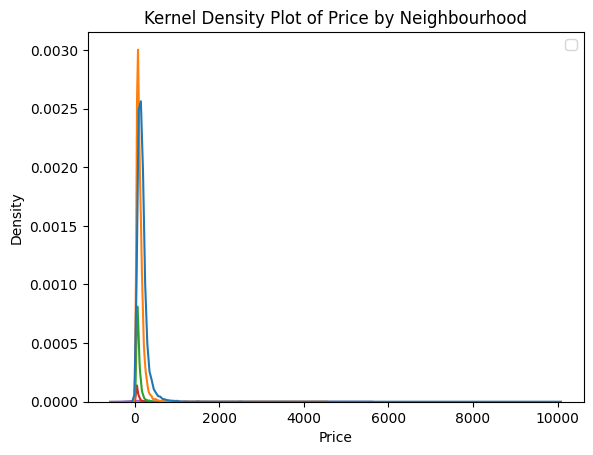

In [ ]:
sns.kdeplot(x=df['Price'], hue=df['Neighbourhood'])

plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Price by Neighbourhood')
plt.legend()
plt.show()

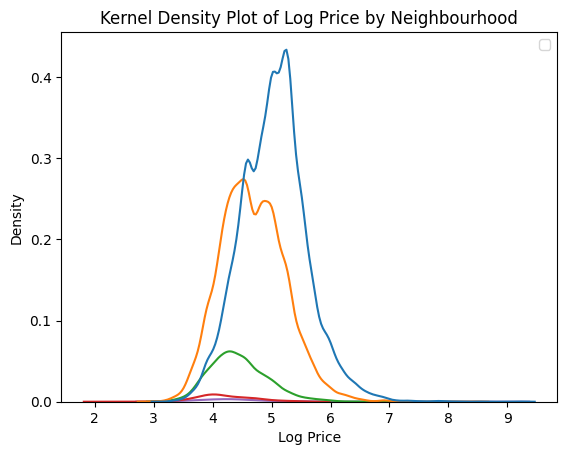

In [ ]:
sns.kdeplot(x=np.log(df['Price']), hue=df['Neighbourhood'])

plt.xlabel('Log Price')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Log Price by Neighbourhood')
plt.legend()
plt.show()

2. Regress price on Neighbourhood by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?

In [ ]:
y = df['Price']
X = pd.get_dummies(df['Neighbourhood'], dtype='int')

from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=False).fit(X,y) # Run regression

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
print('R-squared: ', reg.score(X, y)) # R squared measure
results

R-squared:  0.04631389606035197


,variable,coefficient
0,Bronx,75.276498
1,Brooklyn,127.747378
2,Manhattan,183.664286
3,Queens,96.857233
4,Staten Island,146.166667


the coefficents are the means of the grouped variable. so the coefficent for each neigborhood is the average price for that neigborhood.

3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?

In [ ]:
y = df['Price']
X = pd.get_dummies(df['Neighbourhood'], dtype='int', drop_first = True)

from sklearn import linear_model
reg = linear_model.LinearRegression().fit(X,y) # Run regression

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
print('R-squared: ', reg.score(X, y)) # R squared measure
results

R-squared:  0.04631389606035197


,variable,coefficient
0,Brooklyn,52.470881
1,Manhattan,108.387789
2,Queens,21.580735
3,Staten Island,70.890169


When creating the dummies I have to drop the first one, so that variable will be represented by the intercet. then each of the other coefficents are the difference between the average price from the dropped dummy variable and the average price at in the nigborhood the coeffient is representing.  

4. Split the sample 80/20 into a training and a test set. Run a regression of Price on Review Scores Rating and Neighbourhood. What is the  𝑅2  and RMSE on the test set? What is the coefficient on Review Scores Rating? What is the most expensive kind of property you can rent?

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

y = df['Price']
X = df.loc[:,['Review Scores Rating', 'Neighbourhood'] ]
X = pd.get_dummies(X, columns=['Neighbourhood'], drop_first=False)
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=150) # For replication purposes

reg = linear_model.LinearRegression(fit_intercept=False).fit(X_train,y_train) # Run regression

y_hat = reg.predict(X_test)
print('R-squared: ', reg.score(X_test,y_test)) # R2
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse) # R2

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
results

R-squared:  0.07129400048920465
RMSE:  119.28064173660843


,variable,coefficient
0,Review Scores Rating,1.057851
1,Neighbourhood_Bronx,-20.884785
2,Neighbourhood_Brooklyn,31.082188
3,Neighbourhood_Manhattan,87.373810
4,Neighbourhood_Queens,-0.849490
5,Neighbourhood_Staten Island,55.838416


the coefficient on Review Scores Rating is 1.057851 and the most expensive property you can rent is a property in manhattan with a review of 100

5. Split the sample 80/20 into a training and a test set. Run a regression of Price on Review Scores Rating and Neighbourhood and Property Type. What is the  𝑅2  and RMSE on the test set? What is the coefficient on Review Scores Rating? What is the most expensive kind of property you can rent?

In [ ]:
y = df['Price']
X = df.loc[:,['Review Scores Rating', 'Neighbourhood','Property Type'] ]
X = pd.get_dummies(X, columns=['Neighbourhood','Property Type'], drop_first=False)
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=150) # For replication purposes
reg = linear_model.LinearRegression(fit_intercept=False).fit(X_train,y_train) # Run regression

y_hat = reg.predict(X_test)
print('R-squared: ', reg.score(X_test,y_test)) # R2
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse) # R2

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
results

R-squared:  0.08139385570512137
RMSE:  118.63026878386515


,variable,coefficient
0,Review Scores Rating,1.047519e+00
1,Neighbourhood_Bronx,-3.050618e+01
2,Neighbourhood_Brooklyn,2.852478e+01
3,Neighbourhood_Manhattan,9.019437e+01
4,Neighbourhood_Queens,-5.013281e+00
5,Neighbourhood_Staten Island,3.851481e+01
6,Property Type_Apartment,-3.581001e+00
7,Property Type_Bed & Breakfast,-3.004754e+01
8,Property Type_Boat,4.758182e+01
9,Property Type_Bungalow,2.507021e+01


the coefficent of review score rating is 1.047519. the most expensive type of property you can rent is a Condominium in Manhattan with a rating of 100

6. What does the coefficient on Review Scores Rating mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works

the coefficient on Review Scores Rating means the rate at which the price would change given a one unit change in the score. it changes from part 4 to 5 because there are more explanatory variables included in the model which affect the prediction for y.

7. (Optional) We've included Neighborhood and Property Type separately in the model. How do you interact them, so you can have "A bedroom in Queens" or "A townhouse in Manhattan". Split the sample 80/20 into a training and a test set and run a regression including that kind of "property type X neighborhood" dummy, plus Review Scores Rating. How does the slope coefficient for Review Scores Rating, the  𝑅2 , and the RMSE change? Do they increase significantly compares to part 5? Are the coefficients in this regression just the sum of the coefficients for Neighbourhood and Property Type from 5? What is the most expensive kind of property you can rent?

In [ ]:
y = df['Price']
df['property_neighborhood'] = df['Neighbourhood'].astype('str')+'X'+df['Property Type'].astype('str')
X = df.loc[:,['Review Scores Rating', 'property_neighborhood'] ]
X = pd.get_dummies(X, columns=['property_neighborhood'], drop_first=False)
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=100) # For replication purposes

reg = linear_model.LinearRegression(fit_intercept=False).fit(X_train,y_train) # Run regression

y_hat = reg.predict(X_test)
print('R-squared: ', reg.score(X_test,y_test)) # R2
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse) # R2
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
results

Rsq:  0.08186343343357194
RMSE:  124.01188291277131


,variable,coefficient
0,Review Scores Rating,1.000849e+00
1,property_neighborhood_BronxXApartment,-1.296842e+01
2,property_neighborhood_BronxXBed & Breakfast,-3.508487e+01
3,property_neighborhood_BronxXCondominium,4.693210e+01
4,property_neighborhood_BronxXHouse,-1.930745e+01
5,property_neighborhood_BronxXLoft,6.672341e+00
6,property_neighborhood_BronxXTownhouse,1.692107e+01
7,property_neighborhood_BrooklynXApartment,3.116479e+01
8,property_neighborhood_BrooklynXBed & Breakfast,9.219870e-01
9,property_neighborhood_BrooklynXBoat,4.919370e+00


R-squared increases very slightly and the slope coefficient for Review Scores Rating goes down a little, but neither change significantly from part 5. No they are not just the sum of oefficients for Neighbourhood and Property Type from 5 because we can see the specifics of the price for each property type within each neigborhood. The most expensive property you can rent is a Boat in Queens that has a 100 rating.

# Q2

In [1]:
!git clone https://github.com/DS3001/linearRegression/

Cloning into 'linearRegression'...
remote: Enumerating objects: 66, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 66 (delta 20), reused 11 (delta 11), pack-reused 37 (from 1)
Receiving objects: 100% (66/66), 2.64 MiB | 5.01 MiB/s, done.
Resolving deltas: 100% (22/22), done.


1. Load cars_hw.csv. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
df_cars = pd.read_csv('/content/linearRegression/data/cars_hw.csv')
df_cars.head()

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


2. Summarize the Price variable and create a kernel density plot. Use .groupby() and .describe() to summarize prices by brand (Make). Make a grouped kernel density plot by Make. Which car brands are the most expensive? What do prices look like in general?

In [4]:
df_cars['Price'].groupby(df_cars['Make']).describe()

,count,mean,std,min,25%,50%,75%,max
Make,,,,,,,,
Chevrolet,6.0,4.535000e+05,2.466064e+05,267000.0,288500.0,345500.0,537500.0,892000.0
Datsun,3.0,2.896667e+05,1.050397e+04,279000.0,284500.0,290000.0,295000.0,300000.0
Ford,52.0,7.211731e+05,1.409277e+05,290000.0,635000.0,707500.0,787000.0,1066000.0
Honda,73.0,7.989726e+05,2.665091e+05,316000.0,581000.0,785000.0,915000.0,1537000.0
Hyundai,305.0,6.918918e+05,2.791597e+05,248000.0,485000.0,638000.0,837000.0,1742000.0
Jeep,4.0,1.499500e+06,1.525134e+05,1290000.0,1447500.0,1529500.0,1581500.0,1649000.0
Kia,8.0,1.614750e+06,1.190567e+05,1369000.0,1579000.0,1628500.0,1705750.0,1741000.0
MG Motors,35.0,1.869457e+06,1.216611e+05,1589000.0,1786500.0,1848000.0,1978000.0,2019000.0
Mahindra,18.0,1.100167e+06,1.755493e+05,796000.0,1037000.0,1094500.0,1157000.0,1465000.0


<Axes: xlabel='Price', ylabel='Density'>

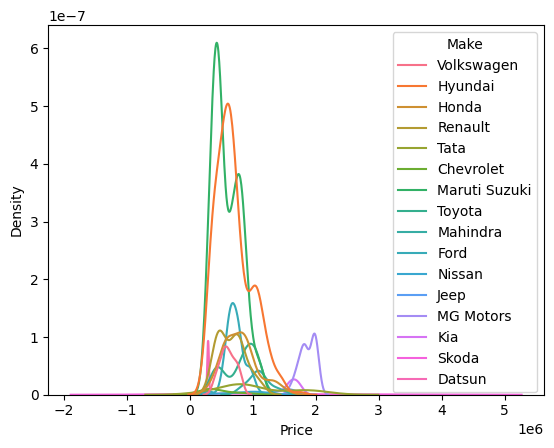

In [5]:
sns.kdeplot(data=df_cars,x='Price',hue='Make')

MG Motors cars are generally the most expensive. Kia is also on the more expensive side. In general, Hyundai cars seem to be just under the median price of cars with an average price of 638000.

3. Split the data into an 80% training set and a 20% testing set.

In [6]:
from sklearn.model_selection import train_test_split
y = df_cars['Price']
df = df_cars[['Make', 'Make_Year', 'Color', 'Body_Type', 'Mileage_Run', 'No_of_Owners', 'Seating_Capacity', 'Fuel_Type', 'Transmission', 'Transmission_Type']]

df_train, df_test, y_train, y_test = train_test_split(df,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=100) # For replication purposes

4. Make a model where you regress price on the numeric variables alone; what is the  𝑅2  and RMSE on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use pd.get_dummies(); be careful of the dummy variable trap); what is the  𝑅2  and RMSE on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the  𝑅2  and RMSE on the test set? Does the joint model perform better or worse, and by home much?

In [7]:
print(df_train.dtypes)

Make                 object
Make_Year             int64
Color                object
Body_Type            object
Mileage_Run           int64
No_of_Owners         object
Seating_Capacity      int64
Fuel_Type            object
Transmission         object
Transmission_Type    object
dtype: object


In [8]:
from sklearn import linear_model

# Numeric:
X_train = df_train.loc[:,['Make_Year','Mileage_Run','Seating_Capacity']]
reg = linear_model.LinearRegression().fit(X_train,y_train) # Run regression
X_test = df_test.loc[:,['Make_Year','Mileage_Run','Seating_Capacity']] # Process test covariates
y_hat = reg.predict(X_test)
print('R-squared: ', reg.score(X_test,y_test))
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse)

R-squared:  0.32451673234191913
RMSE:  304548.9673434066


In [9]:
from sklearn.linear_model import LinearRegression
#Catagorical
X_train2 = df_train.loc[:,['Make','Body_Type','No_of_Owners','Color','Fuel_Type','Transmission','Transmission_Type']]
X_test2 = df_test.loc[:,['Make','Body_Type','No_of_Owners','Color','Fuel_Type','Transmission','Transmission_Type']]
# Apply one-hot encoding to both X_train2 and X_test2
X_train2 = pd.get_dummies(X_train2, columns=['Make','Body_Type','No_of_Owners','Color','Fuel_Type','Transmission','Transmission_Type'], drop_first=False) # Apply get_dummies to X_train2 as well
X_test2 = pd.get_dummies(X_test2, columns=['Make','Body_Type','No_of_Owners','Color','Fuel_Type','Transmission','Transmission_Type'], drop_first=False)

#I used the build in AI debugger to fix the issue that there were colums in the train set and not in the test
# Get all unique columns from both datasets
all_columns = X_train2.columns.union(X_test2.columns)
# Reindex both datasets to include all columns, filling missing values with 0
X_train2 = X_train2.reindex(columns=all_columns, fill_value=0)
X_test2 = X_test2.reindex(columns=all_columns, fill_value=0)

reg2 = LinearRegression(fit_intercept=False).fit(X_train2,y_train) # Run regression

y_hat2 = reg2.predict(X_test2)
print('R-squared: ', reg2.score(X_test2,y_test))
rmse2 = np.sqrt( np.mean( (y_test - y_hat2)**2 ))
print('RMSE: ', rmse2) # R2

results = pd.DataFrame({'variable':reg2.feature_names_in_, 'coefficient': reg2.coef_}) # Regression coefficients
#results

R-squared:  0.7855113535762354
RMSE:  171613.71299031863


The catagorical model preforms better on the test set.

In [10]:
# Combine numeric and categorical
X_train_all = pd.concat([X_train, X_train2],axis=1, ignore_index=True)
X_test_all = pd.concat([X_test, X_test2],axis=1, ignore_index=True)
#
reg_all = linear_model.LinearRegression().fit(X_train_all,y_train) # Run regression
y_hat_all = reg_all.predict(X_test_all)
print('R-squared: ', reg_all.score(X_test_all,y_test)) # R2
rmse_all = np.sqrt( np.mean( (y_test - y_hat_all)**2 ))
print('RMSE: ', rmse_all) # R2

R-squared:  0.8661770915901487
RMSE:  135554.85150380307


The joint model preforms sligtly better than the catagorical model and considerably better than the numeric

5. Use the PolynomialFeatures function from sklearn to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the  𝑅2  and RMSE change? At what point does  𝑅2  go negative on the test set? For your best model with expanded features, what is the  𝑅2  and RMSE? How does it compare to your best model from part 4?

In [11]:
from sklearn.preprocessing import PolynomialFeatures

for d in np.arange(2,13):
    expander = PolynomialFeatures(degree=d,include_bias=False)
    #
    # Expand variables:
    Z = expander.fit_transform(X_test)
    names = expander.get_feature_names_out() # Get the names of these variables
    X_test_d = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe
    Z = expander.fit_transform(X_train)
    names = expander.get_feature_names_out() # Get the names of these variables
    X_train_d = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe
    X_train_d.reset_index(drop=True, inplace=True)
    X_train2.reset_index(drop=True, inplace=True)
    X_train_all = pd.concat([X_train_d, X_train2], axis=1, ignore_index=True)
    #
    # Reset indices for concatenating:
    X_test_d.reset_index(drop=True, inplace=True)
    X_test2.reset_index(drop=True, inplace=True)
    X_test_all = pd.concat([X_test_d, X_test2], axis=1, ignore_index=True)
    #
    # Regression metrics:
    reg_all = linear_model.LinearRegression().fit(X_train_all,y_train) # Run regression
    print(d, ' Rsq: ', reg_all.score(X_test_all,y_test)) # R2
    y_hat_all = reg_all.predict(X_test_all)
    rmse_all = np.sqrt( np.mean( (y_test - y_hat_all)**2 ))
    print(d, 'RMSE: ', rmse_all) # R2

2  Rsq:  0.8723080742979172
2 RMSE:  132413.28248019711
3  Rsq:  0.8474960917179489
3 RMSE:  144707.25998119626
4  Rsq:  0.37776490073636315
4 RMSE:  292298.836125945
5  Rsq:  0.35626856377692684
5 RMSE:  297304.9858908236
6  Rsq:  0.3461078104753684
6 RMSE:  299642.15264088614
7  Rsq:  0.3363075464220949
7 RMSE:  301879.2575671134
8  Rsq:  0.32283555435034716
8 RMSE:  304927.7205027123
9  Rsq:  0.2181356276561197
9 RMSE:  327654.0536902577
10  Rsq:  0.12812221900826726
10 RMSE:  346001.2267104543
11  Rsq:  0.089894744141231
11 RMSE:  353505.0681958631
12  Rsq:  -0.04037441710292233
12 RMSE:  377958.97765803785


R-squared goes up when increasing the degree of expansion from 1 to 2, then after that it goes down. r-squared goes negative on the test set at the 12the degree. the best model is the second degree with Rsq:  0.8723080742979172 and RMSE:  132413.28248019711 which is sligtly better than my combined model from earlier.

6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

<Axes: xlabel='Price'>

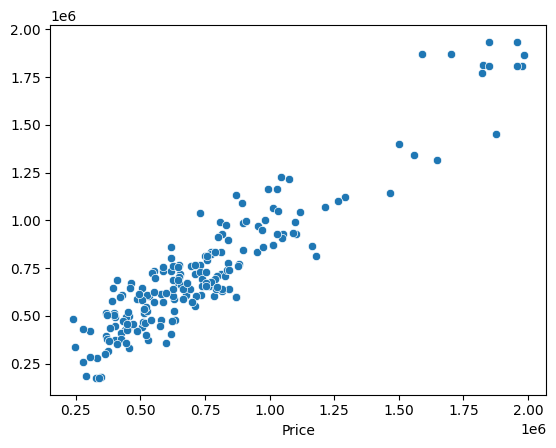

In [12]:
expander = PolynomialFeatures(degree=2,include_bias=False)
Z = expander.fit_transform(X_test)
names = expander.get_feature_names_out() # Get the names of these variables
X_test_d = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe
#
Z = expander.fit_transform(X_train)
names = expander.get_feature_names_out() # Get the names of these variables
X_train_d = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe
#
X_train_d.reset_index(drop=True, inplace=True)
X_train2.reset_index(drop=True, inplace=True)
X_train_all = pd.concat([X_train_d, X_train2], axis=1)
X_train_all.columns = X_train_all.columns.astype(str)
# Reset indices for concatenating:
X_test_d.reset_index(drop=True, inplace=True)
X_test2.reset_index(drop=True, inplace=True)
X_test_all = pd.concat([X_test_d, X_test2], axis=1)
X_test_all.columns = X_test_all.columns.astype(str)
# Run regression
reg_all = linear_model.LinearRegression().fit(X_train_all,y_train) # Run regression
# Predictions and residuals:
y_hat_all = reg_all.predict(X_test_all)
residuals = y_test - y_hat_all

# Scatterplot:
sns.scatterplot(x=y_test,y=y_hat_all)

Do the predicted values and true values roughly line up along the diagonal, or not?

Yes the predicted values appear to line up along the diagonal.

In [14]:
from sklearn import tree

X_train.reset_index(drop=True, inplace=True)
X_train2.reset_index(drop=True, inplace=True)
X_train_all = pd.concat([X_train, X_train2],axis=1)
X_train_all.columns = X_train_all.columns.astype(str)
X_test.reset_index(drop=True, inplace=True)
X_test2.reset_index(drop=True, inplace=True)
X_test_all = pd.concat([X_test, X_test2],axis=1)
X_test_all.columns = X_test_all.columns.astype(str)

sup_depth = 20
for d in np.arange(2,sup_depth):
    model = tree.DecisionTreeRegressor(max_depth=d) # Fit the classifier
    cart = model.fit(X_train_all, y_train) #
    cart.score(X_test_all,y_test)
    y_hat = cart.predict(X_test_all)
    rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
    print('Depth: ', d, ', RMSE: ', rmse, ', Rsq: ', cart.score(X_test_all,y_test)) # R2

Depth:  2 , RMSE:  205966.90210201027 , Rsq:  0.691045014990626
Depth:  3 , RMSE:  171678.82761878346 , Rsq:  0.7853485577498043
Depth:  4 , RMSE:  168677.2997258165 , Rsq:  0.7927886152194853
Depth:  5 , RMSE:  166566.69627308732 , Rsq:  0.7979417082862865
Depth:  6 , RMSE:  151408.29583896731 , Rsq:  0.8330449054874149
Depth:  7 , RMSE:  143269.73574669394 , Rsq:  0.8505109944463048
Depth:  8 , RMSE:  145809.91220424685 , Rsq:  0.8451631134208604
Depth:  9 , RMSE:  139115.31438263788 , Rsq:  0.8590548240222893
Depth:  10 , RMSE:  126202.89323842885 , Rsq:  0.8840050837070093
Depth:  11 , RMSE:  129308.13285736644 , Rsq:  0.8782267170248319
Depth:  12 , RMSE:  126956.612160056 , Rsq:  0.8826154383211758
Depth:  13 , RMSE:  124341.88602370319 , Rsq:  0.8874008183669784
Depth:  14 , RMSE:  127877.04096611026 , Rsq:  0.8809072045038651
Depth:  15 , RMSE:  123742.32718248254 , Rsq:  0.8884840747919549
Depth:  16 , RMSE:  134777.7198651778 , Rsq:  0.8677070981711552
Depth:  17 , RMSE:  132

<Axes: xlabel='Price', ylabel='Density'>

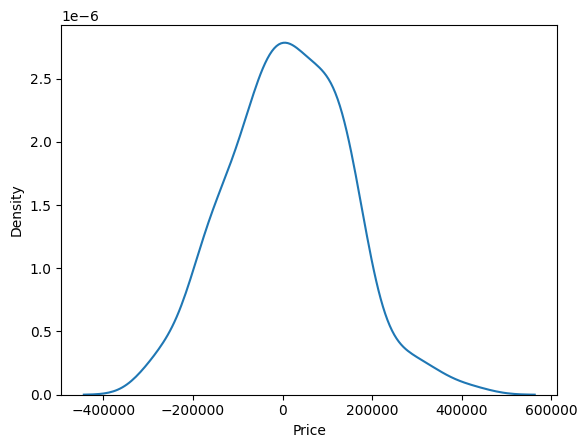

In [13]:
sns.kdeplot(residuals)

the residuals apear to be unimodal and centered at 0.